# Flights Data Exploration
## by Leqi Lu

## Preliminary Wrangling

This document explores a dataset containing flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. 

In [9]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [10]:
# retrieve names of all the csv files 
import os
import re

pattern = '\d+.csv'
csv_files = [x for x in os.listdir() if re.match(pattern, x)]
print(csv_files)

['1987.csv', '1988.csv', '1989.csv', '1990.csv', '1991.csv', '1992.csv', '1993.csv', '1994.csv', '1995.csv', '1996.csv', '1997.csv', '1998.csv', '1999.csv', '2000.csv', '2001.csv', '2002.csv', '2003.csv', '2004.csv', '2005.csv', '2006.csv', '2007.csv', '2008.csv']


In [11]:
# function to sample 10000 entries from each year's data  
# and load all the sampled data into flights_sample

def load_data(filenames, flights_sample):
    for filename in filenames:
        print(filename)
        df = pd.read_csv(filename, low_memory=False)
        df_sample = df.sample(10000, random_state=67)
        flights_sample = pd.concat([flights_sample, df_sample], axis=0)
        flights_sample.reset_index(drop=True, inplace=True)
        del df
    return flights_sample

In [12]:
flights_sample_original = pd.DataFrame()
flights_sample_original = load_data(csv_files, flights_sample_original)

1987.csv
1988.csv
1989.csv
1990.csv
1991.csv
1992.csv
1993.csv
1994.csv
1995.csv
1996.csv
1997.csv
1998.csv
1999.csv
2000.csv
2001.csv
2002.csv
2003.csv
2004.csv
2005.csv
2006.csv
2007.csv
2008.csv


In [13]:
# overview of data shape 
print(flights_sample_original.shape)
flights_sample_original.head(10)

(220000, 29)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1987,12,2,3,1945.0,1945,2050.0,2045,NW,976,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1987,11,23,1,1029.0,1030,1500.0,1527,CO,524,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1987,12,7,1,702.0,704,934.0,930,UA,360,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1987,10,8,4,629.0,630,945.0,948,UA,680,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1987,10,26,1,715.0,715,747.0,750,HP,1025,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,1987,11,11,3,730.0,719,845.0,828,AA,1003,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,1987,11,3,2,1800.0,1800,1934.0,1918,AA,2154,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,1987,11,4,3,1234.0,1234,1329.0,1338,EA,554,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,1987,10,16,5,1626.0,1628,1653.0,1654,UA,248,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,1987,10,5,1,2137.0,2135,2221.0,2220,US,190,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [14]:
# descriptive statistics for numeric variables
print(flights_sample_original.describe())

                Year          Month     DayofMonth      DayOfWeek  \
count  220000.000000  220000.000000  220000.000000  220000.000000   
mean     1997.500000       6.709682      15.723418       3.939432   
std         6.344303       3.482753       8.790665       1.988839   
min      1987.000000       1.000000       1.000000       1.000000   
25%      1992.000000       4.000000       8.000000       2.000000   
50%      1997.500000       7.000000      16.000000       4.000000   
75%      2003.000000      10.000000      23.000000       6.000000   
max      2008.000000      12.000000      31.000000       7.000000   

             DepTime     CRSDepTime        ArrTime     CRSArrTime  \
count  215926.000000  220000.000000  215403.000000  220000.000000   
mean     1350.489872    1335.937777    1492.877787    1489.631664   
std       477.584184     477.340890     499.386176     494.750638   
min         1.000000       0.000000       1.000000       0.000000   
25%       934.000000     930.0000

In [15]:
# high-level overview of data composition
flights_sample_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220000 entries, 0 to 219999
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               220000 non-null  int64  
 1   Month              220000 non-null  int64  
 2   DayofMonth         220000 non-null  int64  
 3   DayOfWeek          220000 non-null  int64  
 4   DepTime            215926 non-null  float64
 5   CRSDepTime         220000 non-null  int64  
 6   ArrTime            215403 non-null  float64
 7   CRSArrTime         220000 non-null  int64  
 8   UniqueCarrier      220000 non-null  object 
 9   FlightNum          220000 non-null  int64  
 10  TailNum            139765 non-null  object 
 11  ActualElapsedTime  215398 non-null  float64
 12  CRSElapsedTime     219957 non-null  float64
 13  AirTime            136659 non-null  float64
 14  ArrDelay           215398 non-null  float64
 15  DepDelay           215926 non-null  float64
 16  Or

In [16]:
flights_sample_original.sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
173033,2004,5,10,1,1153.0,1151,1335.0,1330,DL,1489,...,5.0,21.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
84525,1995,10,30,1,608.0,610,1055.0,1111,UA,142,...,3.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
123689,1999,5,27,4,1659.0,1700,1844.0,1840,NW,45,...,6.0,32.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
209381,2007,6,22,5,2010.0,2005,2135.0,2130,OO,5830,...,4.0,23.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
165757,2003,5,6,2,653.0,656,804.0,814,OO,6976,...,7.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
113401,1998,6,4,4,1249.0,1215,1435.0,1353,DL,1893,...,8.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
169962,2003,4,17,4,2347.0,2351,228.0,236,HP,499,...,6.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
46075,1991,3,17,7,1425.0,1425,1604.0,1600,ML (1),317,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
58704,1992,2,20,4,1755.0,1735,1807.0,1755,WN,923,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
82663,1995,1,5,4,1943.0,1940,2156.0,2134,NW,397,...,3.0,44.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [17]:
# dropping less relevant columns
flights_sample_original = flights_sample_original.drop(columns=['FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
                             'Origin', 'Dest', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 
                             'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'])

### Quality

- ~Erroneous datatypes (DepTime, CRSDepTime, ArrTime, CRSArrTime, ArrDelay, DepDelay)~
- ~Missing information on Deptime, ArrTime, ArrDelay, DepDelay, Distance)~

### Tidiness
- ~DayofMonth does not follow naming convention~

In [18]:
flights_sample = flights_sample_original.copy()

#### DayofMonth does not follow naming convention

##### Define
Change DayofMonth to DayOfMonth

##### Code

In [19]:
flights_sample = flights_sample.rename(columns={'DayofMonth': 'DayOfMonth'})

In [20]:
flights_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220000 entries, 0 to 219999
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           220000 non-null  int64  
 1   Month          220000 non-null  int64  
 2   DayOfMonth     220000 non-null  int64  
 3   DayOfWeek      220000 non-null  int64  
 4   DepTime        215926 non-null  float64
 5   CRSDepTime     220000 non-null  int64  
 6   ArrTime        215403 non-null  float64
 7   CRSArrTime     220000 non-null  int64  
 8   UniqueCarrier  220000 non-null  object 
 9   ArrDelay       215398 non-null  float64
 10  DepDelay       215926 non-null  float64
 11  Distance       219584 non-null  float64
dtypes: float64(5), int64(6), object(1)
memory usage: 20.1+ MB


#### Missing information on Deptime, ArrTime, ArrDelay, DepDelay, Distance)
##### Define
Check empty records on Deptime, ArrTime, ArrDelay, DepDelay, Distance and remove/modify as necessary.
##### Code

In [21]:
# check null DepTime records
dep_null = flights_sample['DepTime'].isnull()
flights_sample.loc[dep_null, :].describe()

,Year,Month,DayOfMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ArrDelay,DepDelay,Distance
count,4074.000000,4074.000000,4074.000000,4074.000000,0.0,4074.000000,0.0,4074.000000,0.0,0.0,4068.000000
mean,1998.767059,6.218949,15.335052,3.766814,NaN,1336.668630,NaN,1489.431762,NaN,NaN,604.562930
std,5.851504,3.774997,8.569321,1.923179,NaN,473.834831,NaN,494.384986,NaN,NaN,479.536708
min,1987.000000,1.000000,1.000000,1.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,24.000000
25%,1995.000000,3.000000,8.000000,2.000000,NaN,930.000000,NaN,1116.250000,NaN,NaN,265.500000
50%,1999.000000,6.000000,15.000000,4.000000,NaN,1340.000000,NaN,1528.500000,NaN,NaN,448.000000
75%,2003.000000,9.000000,23.000000,5.000000,NaN,1725.000000,NaN,1908.000000,NaN,NaN,799.000000
max,2008.000000,12.000000,31.000000,7.000000,NaN,2359.000000,NaN,2359.000000,NaN,NaN,3801.000000


In [22]:
# dep_null records are all missing DepTime, ArrTime, ArrDelay and DepDelay, we could remove them safely
flights_sample.drop(flights_sample.index[dep_null], inplace=True)

In [23]:
# check null arrTime records
arr_null = flights_sample['ArrTime'].isnull()
flights_sample.loc[arr_null, :].describe()

,Year,Month,DayOfMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ArrDelay,DepDelay,Distance
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.00000,0.0,523.000000,0.0,523.000000,522.000000
mean,1996.606119,6.743786,16.428298,3.963671,1379.527725,1349.31740,NaN,1549.944551,NaN,25.502868,894.764368
std,6.593399,3.583077,8.534364,1.961463,511.588152,494.67929,NaN,515.850786,NaN,74.155769,644.095861
min,1987.000000,1.000000,1.000000,1.000000,19.000000,0.00000,NaN,0.000000,NaN,-855.000000,21.000000
25%,1990.000000,3.500000,9.500000,2.000000,914.000000,900.00000,NaN,1136.000000,NaN,-1.000000,404.500000
50%,1996.000000,7.000000,16.000000,4.000000,1407.000000,1355.00000,NaN,1630.000000,NaN,2.000000,743.500000
75%,2002.000000,10.000000,23.000000,6.000000,1816.000000,1737.00000,NaN,1949.500000,NaN,25.000000,1165.000000
max,2008.000000,12.000000,31.000000,7.000000,2333.000000,2318.00000,NaN,2400.000000,NaN,735.000000,4243.000000


In [24]:
# remove null arrTime records
flights_sample.drop(flights_sample.index[arr_null], inplace=True)

In [25]:
# check null ArrDelay records
arr_delay_null = flights_sample['ArrDelay'].isnull()
flights_sample.loc[arr_delay_null, :]

,Year,Month,DayOfMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ArrDelay,DepDelay,Distance
210470,2008,10,25,6,1533.0,1540,2312.0,1725,MQ,NaN,-7.0,431.0
213386,2008,12,24,3,941.0,855,1126.0,945,WN,NaN,46.0,181.0
214203,2008,10,26,7,1717.0,1720,908.0,558,NW,NaN,-3.0,3972.0
214563,2008,12,27,6,720.0,650,1240.0,900,MQ,NaN,30.0,1021.0
216466,2008,11,29,6,556.0,600,1101.0,950,UA,NaN,-4.0,2704.0


In [26]:
# manually fill the null entries for ArrDelay
flights_sample.at[210470, 'ArrDelay'] = 547
flights_sample.at[213386, 'ArrDelay'] = 141
flights_sample.at[214203, 'ArrDelay'] = 310
flights_sample.at[214563, 'ArrDelay'] = 340
flights_sample.at[216466, 'ArrDelay'] = 111

In [27]:
flights_sample.loc[arr_delay_null, :]

,Year,Month,DayOfMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ArrDelay,DepDelay,Distance
210470,2008,10,25,6,1533.0,1540,2312.0,1725,MQ,547.0,-7.0,431.0
213386,2008,12,24,3,941.0,855,1126.0,945,WN,141.0,46.0,181.0
214203,2008,10,26,7,1717.0,1720,908.0,558,NW,310.0,-3.0,3972.0
214563,2008,12,27,6,720.0,650,1240.0,900,MQ,340.0,30.0,1021.0
216466,2008,11,29,6,556.0,600,1101.0,950,UA,111.0,-4.0,2704.0


In [28]:
# check null distance entries
dist_null = flights_sample['Distance'].isnull()
flights_sample.loc[dist_null, :]

,Year,Month,DayOfMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ArrDelay,DepDelay,Distance
145,1987,12,15,2,1315.0,1255,1554.0,1535,AS,19.0,20.0,NaN
1856,1987,11,20,5,914.0,915,1003.0,945,AS,18.0,-1.0,NaN
2119,1987,11,3,2,700.0,700,749.0,755,AS,-6.0,0.0,NaN
3618,1987,11,3,2,825.0,830,1100.0,1111,AS,-11.0,-5.0,NaN
4913,1987,11,22,7,1547.0,1550,1637.0,1635,AS,2.0,-3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
85875,1995,10,26,4,616.0,615,726.0,719,DL,7.0,1.0,NaN
86902,1995,11,7,2,942.0,942,1049.0,1050,DL,-1.0,0.0,NaN
87278,1995,10,9,1,1040.0,1040,1145.0,1140,WN,5.0,0.0,NaN
89735,1995,11,15,3,1735.0,1735,1915.0,1940,WN,-25.0,0.0,NaN


In [29]:
# there are only 409 entries and we cannot meaningfully fill them with means or medians, 
# so we are removing them
flights_sample.drop(flights_sample.index[dist_null], inplace=True)

##### Test

In [30]:
flights_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214994 entries, 0 to 219999
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           214994 non-null  int64  
 1   Month          214994 non-null  int64  
 2   DayOfMonth     214994 non-null  int64  
 3   DayOfWeek      214994 non-null  int64  
 4   DepTime        214994 non-null  float64
 5   CRSDepTime     214994 non-null  int64  
 6   ArrTime        214994 non-null  float64
 7   CRSArrTime     214994 non-null  int64  
 8   UniqueCarrier  214994 non-null  object 
 9   ArrDelay       214994 non-null  float64
 10  DepDelay       214994 non-null  float64
 11  Distance       214994 non-null  float64
dtypes: float64(5), int64(6), object(1)
memory usage: 21.3+ MB


#### Erroneous datatypes (DepTime, CRSDepTime, ArrTime, CRSArrTime, ArrDelay, DepDelay)
##### Define
Change DepTime, CRSDepTime, ArrTime, CRSArrTime to string, ArrDelay and DepDelay to int.
##### Code

In [31]:
def format_change(columns):
    for c in columns:
        flights_sample[c] = flights_sample[c].astype(int)
        #flights_sample[c] = flights_sample[c].str.replace('\.0', '', regex=True)
        #flights_sample[c] = flights_sample[c].str.zfill(4)

        #flights_sample[c] = flights_sample[c].apply(lambda x: "{}:{}".format(x[:2],x[2:]))

In [32]:
columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ArrDelay', 'DepDelay']

format_change(columns)

##### Test

In [33]:
flights_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214994 entries, 0 to 219999
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           214994 non-null  int64  
 1   Month          214994 non-null  int64  
 2   DayOfMonth     214994 non-null  int64  
 3   DayOfWeek      214994 non-null  int64  
 4   DepTime        214994 non-null  int32  
 5   CRSDepTime     214994 non-null  int32  
 6   ArrTime        214994 non-null  int32  
 7   CRSArrTime     214994 non-null  int32  
 8   UniqueCarrier  214994 non-null  object 
 9   ArrDelay       214994 non-null  int32  
 10  DepDelay       214994 non-null  int32  
 11  Distance       214994 non-null  float64
dtypes: float64(1), int32(6), int64(4), object(1)
memory usage: 16.4+ MB


In [34]:
flights_sample.head(10)

,Year,Month,DayOfMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ArrDelay,DepDelay,Distance
0,1987,12,2,3,1945,1945,2050,2045,NW,5,0,256.0
1,1987,11,23,1,1029,1030,1500,1527,CO,-27,-1,1123.0
2,1987,12,7,1,702,704,934,930,UA,4,-2,495.0
3,1987,10,8,4,629,630,945,948,UA,-3,-1,957.0
4,1987,10,26,1,715,715,747,750,HP,-3,0,110.0
5,1987,11,11,3,730,719,845,828,AA,17,11,328.0
6,1987,11,3,2,1800,1800,1934,1918,AA,16,0,337.0
7,1987,11,4,3,1234,1234,1329,1338,EA,-9,0,270.0
8,1987,10,16,5,1626,1628,1653,1654,UA,-1,-2,74.0
9,1987,10,5,1,2137,2135,2221,2220,US,1,2,164.0


In [35]:
flights_sample.to_csv('flights_sample.csv', index=False)

In [169]:
flights_sample = pd.read_csv('flights_sample.csv')
flights_sample.head()

,Year,Month,DayOfMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ArrDelay,DepDelay,Distance
0,1987,12,2,3,1945,1945,2050,2045,NW,5,0,256.0
1,1987,11,23,1,1029,1030,1500,1527,CO,-27,-1,1123.0
2,1987,12,7,1,702,704,934,930,UA,4,-2,495.0
3,1987,10,8,4,629,630,945,948,UA,-3,-1,957.0
4,1987,10,26,1,715,715,747,750,HP,-3,0,110.0


In [170]:
flights_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214994 entries, 0 to 214993
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           214994 non-null  int64  
 1   Month          214994 non-null  int64  
 2   DayOfMonth     214994 non-null  int64  
 3   DayOfWeek      214994 non-null  int64  
 4   DepTime        214994 non-null  int64  
 5   CRSDepTime     214994 non-null  int64  
 6   ArrTime        214994 non-null  int64  
 7   CRSArrTime     214994 non-null  int64  
 8   UniqueCarrier  214994 non-null  object 
 9   ArrDelay       214994 non-null  int64  
 10  DepDelay       214994 non-null  int64  
 11  Distance       214994 non-null  float64
dtypes: float64(1), int64(10), object(1)
memory usage: 19.7+ MB


### What is the structure of your dataset?

The original dataset has nearly 120 million records in total, so I sampled 10,000 records from each year and combined them into a new dataset with 220,000 entries and 12 features (Year, Month, DayOfMonth, DayOfWeek, DepTime, CRSDepTime, ArrTime, CRSArrTime, UniqueCarrier, ArrDelay, DepDelay, Distance). After removing null values, there are 214,994 data entries in total.

DayOfWeek: 1 (Monday) - 7 (Sunday)

### What is/are the main feature(s) of interest in your dataset?

I am most interested in figuring out what the best time to fly is to minimize arrival delay.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect the DepTime to have the strongest effect on arrival delays: later departure times result in later arrival time. Other than that, I think DayOfWeek would also affect arrival delays - weekends are going to have more delays than weekdays. I also think that carriers will have effects on delays too, though to a much smaller degree than the main effect of DepTime and DayOfWeek.

## Univariate Exploration

In [171]:
# decide if a trip is short/medium/long
conditions = [
    (flights_sample['Distance'] <700),
    (flights_sample['Distance'] >= 700) & (flights_sample['Distance'] < 3000),
    (flights_sample['Distance'] >= 3000)
]

hauls = ['Short', 'Medium', 'Long']

flights_sample['Haul'] = np.select(conditions, hauls)

In [481]:
# make a column to indicate if arrival is on-time 
flights_sample['ArrOnTime'] = flights_sample['ArrDelay'] <= 0
flights_sample['DepOnTime'] = flights_sample['DepDelay'] <= 0

I will start by looking at the distribution of on-time vs delayed arrival flights.

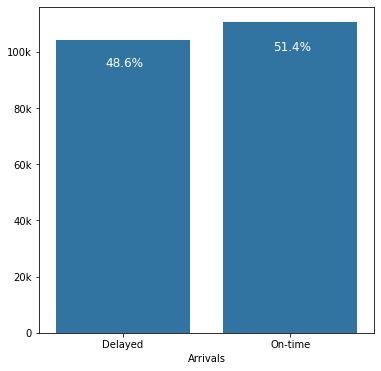

In [173]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[6, 6])

ax = sb.countplot(data=flights_sample, x='ArrOnTime', color=base_color)
plt.xticks([False, True], ['Delayed', 'On-time'])
plt.xlabel('Arrivals')
plt.ylabel('')
plt.yticks([0, 2e4, 4e4, 6e4, 8e4, 1e5], ['0', '20k', '40k', '60k', '80k', '100k'])

total = flights_sample.shape[0]

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2.7
    y = p.get_y() + p.get_height()/1.1
    ax.annotate(percentage, (x, y), size=12, color='white')

plt.show();

From the graph above, we can see that there are slightly more on-time arrivals than delayed ones - 51.4% of all the flights taken were on time! That is a good start. Next, let's check the distribution of flights taken on each day of the week, each month, and each day of the month.

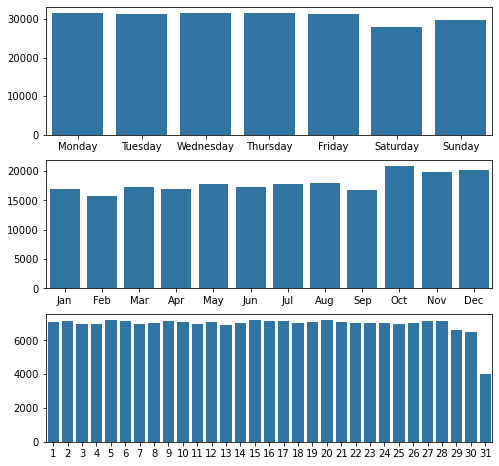

In [174]:
fig, ax = plt.subplots(nrows = 3, figsize = [8,8])

sb.countplot(data=flights_sample, x='DayOfWeek', color=base_color, ax=ax[0])
ax[0].set_xticks(np.arange(0, 7, 1))
ax[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sb.countplot(data=flights_sample, x='Month', color=base_color, ax=ax[1])
ax[1].set_xticks(np.arange(0,12,1))
ax[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax[1].set_xlabel('')
ax[1].set_ylabel('');

sb.countplot(data=flights_sample, x='DayOfMonth', color=base_color, ax=ax[2])
ax[2].set_xlabel('')
ax[2].set_ylabel('');

In [175]:
print(flights_sample['DayOfWeek'].value_counts())
print(flights_sample['Month'].value_counts())

1    31526
4    31526
3    31500
2    31397
5    31334
7    29806
6    27905
Name: DayOfWeek, dtype: int64
10    20748
12    20128
11    19774
8     17983
7     17795
5     17694
3     17318
6     17224
4     16998
1     16933
9     16691
2     15708
Name: Month, dtype: int64


To my surprise, less people are flying during the weekend than during the weekdays. All of the weekdays have a similar amount of flights per day, while Saturday has about 10% less flights. On the other hand, October, November and December are the peak months for traveling, especially October, with about 25% more flights in general than the least popular month to travel, February. Interestingly, the amount of flights per day is similar thoughout the month, except for day 29, 30 and 31. It is understandable that day 31 has less flights because more than half of the months don't have day 31. 

Next up, let's take a look at what's the popular time of day to fly.

In [211]:
# convert numbers 1-24 into strings
def make_hour_string():
    hours = []
    for i in np.arange(24):
        if i + 5 < 10:
            hours.append('0' + str(i+5) + ":00")
        elif i + 5 > 24:
            hours.append('0' + str(i+5-24) + ":00")
        else:
            hours.append(str(i+5) + ":00")
    return hours

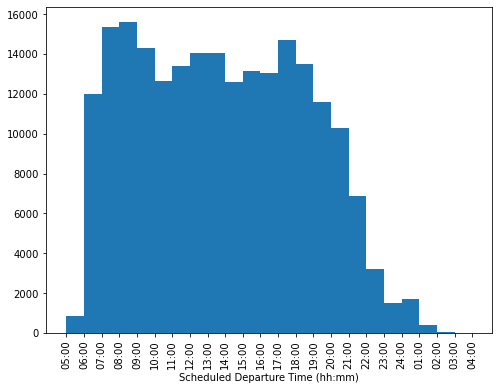

In [212]:
# distribution of scheduled departure time for flights
bins = np.arange(500, 2900, 100)
hours = make_hour_string()

plt.figure(figsize=[8, 6])
plt.hist(data=flights_sample, x='CRSDepTime', bins=bins, color=base_color)
plt.xticks(np.arange(500, 2900, 100), hours)
plt.xlabel('Scheduled Departure Time (hh:mm)')
plt.ylabel('')
plt.xticks(rotation=90);

There is only a few flights between 1 AM and 5 AM, and most of the flights happen between 6 AM and 10 PM, with one peak at around 8 AM, one peak at around 1 PM, and another peak at around 5 PM.

Besides departure time, I am also curious about the distance of each flight.

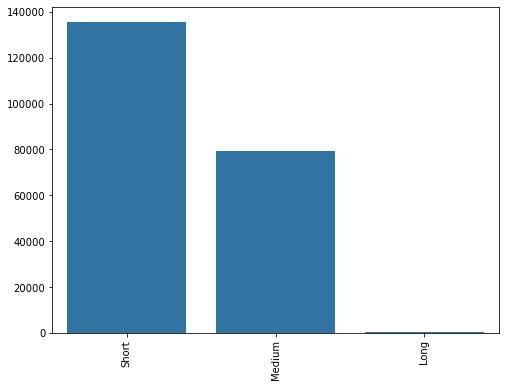

In [153]:
plt.figure(figsize=[8, 6])
sb.countplot(data=flights_sample, x='Haul', color=base_color, order=['Short', 'Medium', 'Long'])
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90);

In [154]:
flights_sample['Haul'].value_counts()

Short     135523
Medium     79155
Long         316
Name: Haul, dtype: int64

Most of the flights in this dataset are short distance flights, with some medium distance ones. There are barely any long distance flights. Let's plot the actual distance and see the distribution.

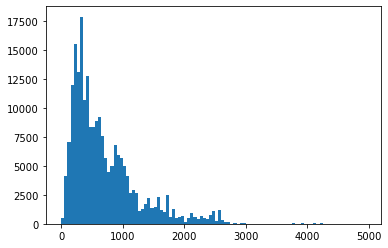

In [440]:
bins = np.arange(1, 5000, 50)
plt.hist(data=flights_sample, x='Distance', color=base_color, bins=bins);

There is a long tail in the distribution, so let's put it on a log scale and see if we can get more information.

In [421]:
np.log10(flights_sample['Distance'].describe())

count    5.332426
mean     2.843258
std      2.741525
min      1.041393
25%      2.482874
50%      2.731589
75%      2.969882
max      3.697491
Name: Distance, dtype: float64

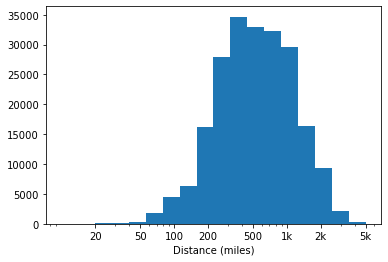

In [445]:
log_binsize = 0.15
bins = 10 ** np.arange(1, np.log10(flights_sample['Distance'].max())+log_binsize, log_binsize)

plt.hist(data=flights_sample, x='Distance', color=base_color, bins = bins)
plt.xscale('log')
plt.xticks([20, 50, 100, 200, 500, 1e3, 2e3, 5e3], 
           [20, 50, 100, 200, 500, '1k', '2k', '5k'])
plt.xlabel('Distance (miles)');

Distance has a long-tailed distribution, with a lot of short distance flights, and a few long distance ones. When plotted on a log scale, the distance distribution looks unimodal, with peak at around 300 miles.

Let's also take a look at the flight distributions by different carriers.

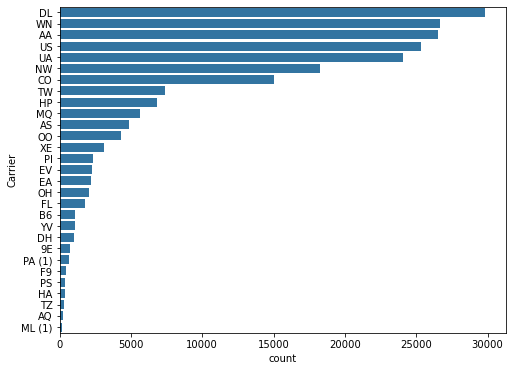

In [155]:
plt.figure(figsize=[8, 6])
sb.countplot(data=flights_sample, y='UniqueCarrier', color=base_color, 
             order=flights_sample['UniqueCarrier'].value_counts().index)
plt.ylabel('Carrier');

The most popular airline is DL (Delta Air Lines), and the range of distribution for airlines is fairy large, I am guessing some of the flight companies stopped their operations between 1987 and 2008.

Lastly, let's check the amount of flights data we have throughout the years 1987 - 2008. 

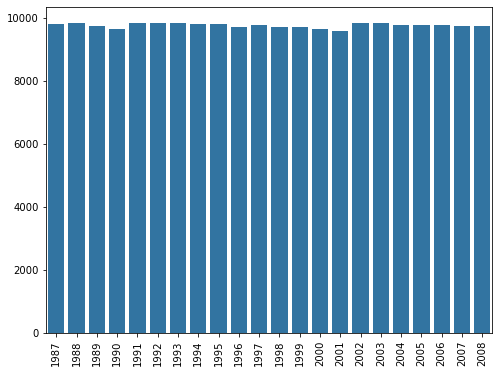

In [131]:
plt.figure(figsize=[8, 6])
sb.countplot(data=flights_sample, x='Year', color=base_color)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90);

Without any surprises, each year have a similar amount of flights, since I sampled 10,000 from each year's data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

51.4% of all the flights taken between 1987 and 2008 are on time. There were no unusual points and therefore no transformations were performed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

5 AM seems to be the time that airports start to get busy, so I shifted the graph of Scheduled Departure Time to start with 5 AM on the left, so that we can observe the waves of flights better throughout the day.

## Bivariate Exploration

First, I would like to look at the distribution of the rate of on-time flights during the day.

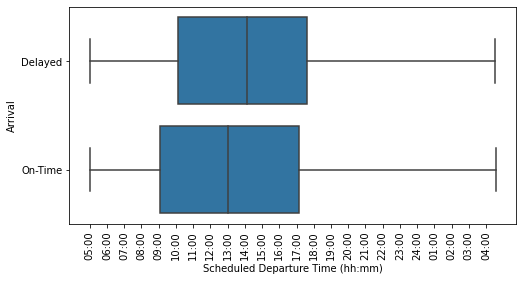

In [254]:
bins = np.arange(500, 2900, 100)
hours = make_hour_string()

plt.figure(figsize=[8, 4])
sb.boxplot(data=flights_sample, y='ArrOnTime', x='CRSDepTime', orient='h', color=base_color)
plt.xticks(np.arange(500, 2900, 100), hours)
plt.xlabel('Scheduled Departure Time (hh:mm)')
plt.yticks([False, True], ['Delayed', 'On-Time'])
plt.ylabel('Arrival')
plt.xticks(rotation=90);

The above box plot suggests that on-time flights usually happen during earlier hours. Let's plot this with a violin plot and see if we can get more information out of it.

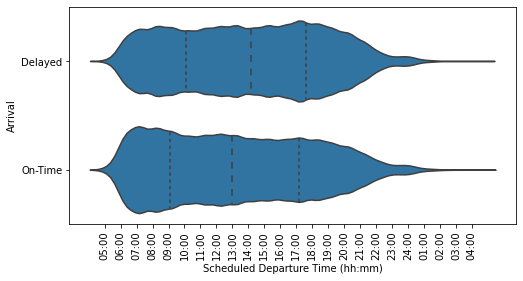

In [253]:
bins = np.arange(500, 2900, 100)
hours = make_hour_string()

plt.figure(figsize=[8, 4])
sb.violinplot(data=flights_sample, y='ArrOnTime', x='CRSDepTime', orient='h', color=base_color, inner='quartile')
plt.xticks(np.arange(500, 2900, 100), hours)
plt.xlabel('Scheduled Departure Time (hh:mm)')
plt.yticks([False, True], ['Delayed', 'On-Time'])
plt.ylabel('Arrival')
plt.xticks(rotation=90);

The violin plot reveals much more than the earlier box plot. It suggests that about 25% of the on-time arrival flights happen in the morning before 9 AM scheduled departure, and 50% before 1 PM schedueld departure, while 25% of delayed arrival flights happen before 10 AM and 50% before 2 PM. 

Next, we will check to see if on-time arrivals are affected by distance travelled.

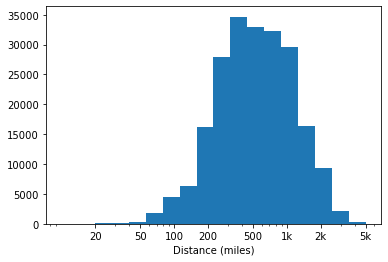

In [443]:
log_binsize = 0.15
bins = 10 ** np.arange(1, np.log10(flights_sample['Distance'].max())+log_binsize, log_binsize)

plt.hist(data=flights_sample, x='Distance', color=base_color, bins = bins)
plt.xscale('log')
plt.xticks([20, 50, 100, 200, 500, 1e3, 2e3, 5e3], 
           [20, 50, 100, 200, 500, '1k', '2k', '5k'])
plt.xlabel('Distance (miles)');

In [448]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

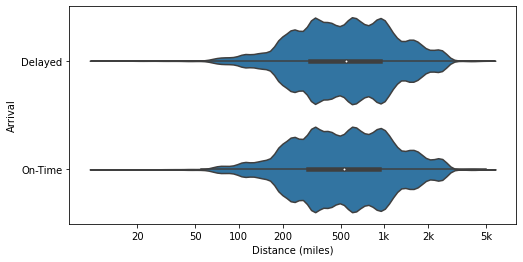

In [462]:
flights_sample['log_distance'] = flights_sample['Distance'].apply(log_trans)

log_binsize = 0.15
bins = 10 ** np.arange(1, np.log10(flights_sample['Distance'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 4])

sb.violinplot(data=flights_sample, y='ArrOnTime', x='log_distance', orient='h', color=base_color)
plt.xticks(log_trans(np.array([20, 50, 100, 200, 500, 1e3, 2e3, 5e3])), 
           [20, 50, 100, 200, 500, '1k', '2k', '5k'])
plt.yticks([False, True], ['Delayed', 'On-Time'])
plt.xlabel('Distance (miles)')
plt.ylabel('Arrival');

Since most of the flights in our data are short distance travels, it makes sense that most of the on-time arrivals and delayed arrivals both happen within 1000-mile travel distance. The graphs are pretty similar between on-time arrivals vs delayed arrivals based on distance, and I will not perform any furhter analysis with distance since it doesn't look like it contributes much to our analysis here.

Next, we will look at the percentage of on-time arrival flights vs delayed arrival flights in DayOfWeek / Month / DayOfMonth / Year.

In [397]:
def show_percentage(plot, feature, num_of_cat, hue_cat, ax, size):
    height = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    
    for i in range(num_of_cat):
        total = feature.value_counts().sort_index(ascending=True).values[i]
        for j in range(hue_cat):
            percentage = '{:.1f}%'.format(100 * height[(j * num_of_cat + i)] / total)
            x = patch[(j * num_of_cat + i)].get_x() + patch[(j * num_of_cat + i)].get_width() / 2 - 0.17
            y = patch[(j * num_of_cat + i)].get_y() + patch[(j * num_of_cat + i)].get_height()/2
            ax.annotate(percentage, (x, y), size=size)

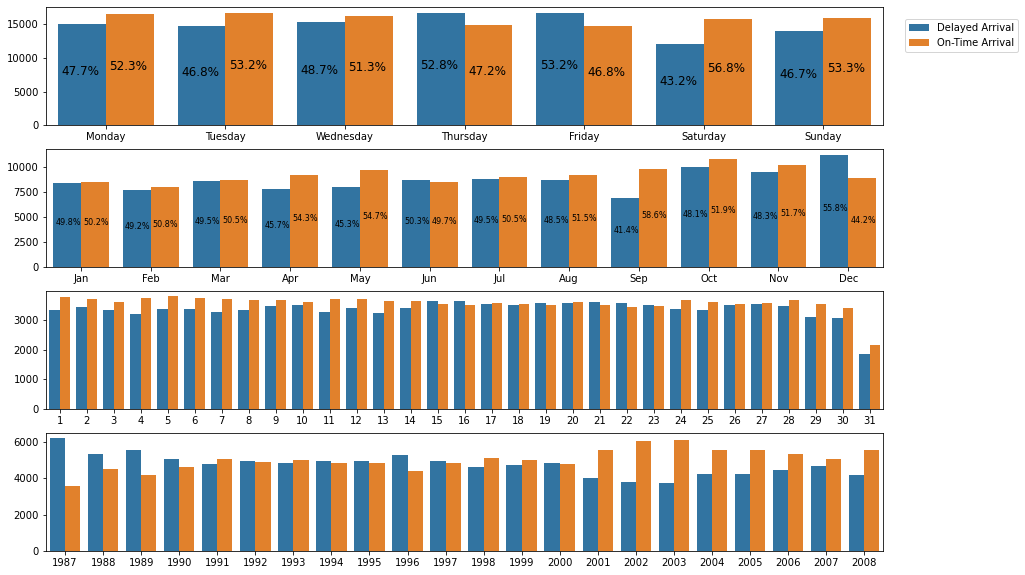

In [400]:
fig, ax = plt.subplots(nrows = 4, figsize = [15,10])

g1 = sb.countplot(data=flights_sample, x='DayOfWeek', hue = 'ArrOnTime', ax=ax[0])
ax[0].set_xticks(np.arange(0, 7, 1))
ax[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].get_legend().remove()
show_percentage(g1, flights_sample['DayOfWeek'], 7, 2, ax[0], 12)

g2 = sb.countplot(data=flights_sample, x='Month', hue = 'ArrOnTime', ax=ax[1])
ax[1].set_xticks(np.arange(0,12,1))
ax[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].get_legend().remove()
show_percentage(g2, flights_sample['Month'], 12, 2, ax[1], 8)

sb.countplot(data=flights_sample, x='DayOfMonth', hue = 'ArrOnTime', ax=ax[2])
ax[2].set_xlabel('')
ax[2].set_ylabel('')
ax[2].get_legend().remove()

sb.countplot(data=flights_sample, x='Year', hue = 'ArrOnTime', ax=ax[3])
ax[3].set_xlabel('')
ax[3].set_ylabel('')
ax[3].get_legend().remove()

fig.legend(bbox_to_anchor=(1.03, 0.87), labels = ['Delayed Arrival', 'On-Time Arrival']);

This plot shows some pretty interesting findings. Thursday and Friday are having the least on-time arrival flights while having about the same amount of flights as the other weekdays. Weekends have less flights in general, but both of the days are having the highest on-time arrival rates. Between all the months, September has the highest rate for on-time arrivals (58.6%), December has the lowest on-time arrivals rate while being one of the most popular months to travel. Most of the months have more than 50% on-time arrival rate except for Jun (49.7%) and December (44.2%). For individual days of the month, we can see that only the 15th, 16th, 19th, 21st, 22nd and 23rd are having more flight delays than on-times. Overall, flights seem to be more on-time than delayed at the beginning of the month as well as at the end of the month. Between 1987 and 2008, the on-time arrival rate of flights has increased drastically, from 60% of the flights are delayed in 1987 to about 58% of the flights are on-time in 2008. We should be able to expect the on-time arrival rate can only get higher and higher from now on.

Before closing this section, we'll take a look at the on-time arrival rate of flights of different unique carriers.

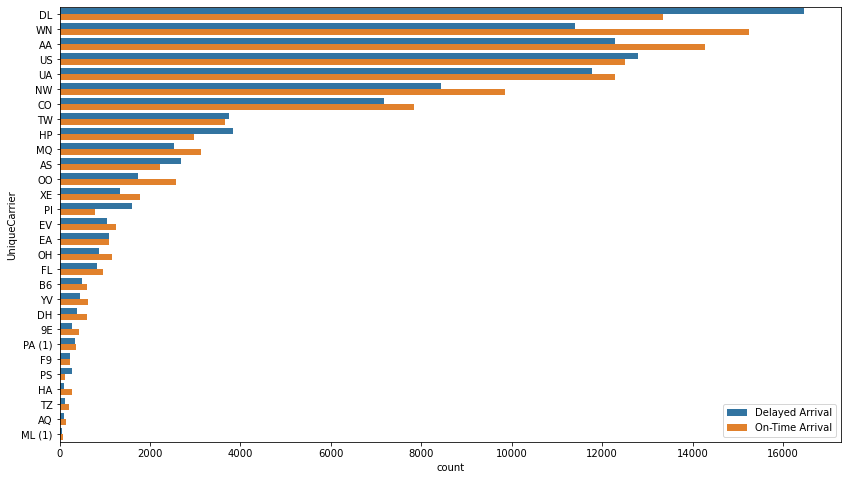

In [326]:
plt.figure(figsize=[14, 8])
ax = sb.countplot(data=flights_sample, y='UniqueCarrier', hue = 'ArrOnTime', 
             order=flights_sample['UniqueCarrier'].value_counts().index)

ax.legend(labels = ['Delayed Arrival', 'On-Time Arrival']);

For the main airline companies in the United States, DL (Delta Air Lines) operates the most flights in the countries, but its on-time arrival rate does not seem as impressive as the amount of flights its operates. WN (Southwest Airlines) operates the second most flights, while having a pretty high on-time arrival rate. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

On-time arrival rate actually have a lot to do with the scheduled departure time and amount of people travelling. Rates are a lot better on early morning and on weekends. To my surprise, distance don't show much effects on on-time arrival rate in our investigation, both box plot and violin plot don't have enough information for us to consider distance to be a valuable feature to keep investigating. Carriers can be a big factor for on-time arrivals too. One of the potentially major interacting factors is the fact that popular carriers fly with more people, and therfore result in more delay arrivals.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Expected on-time arrival rate growth was found in the plot of flights throughout the years. Between 1987 and 2008, the on-time arrival rate of flights has increased drastically, from 60% of the flights are delayed in 1987 to about 58% of the flights are on-time in 2008. We should be able to expect the on-time arrival rate can only get higher and higher from now on.

## Multivariate Exploration

In [ ]:
bins = np.arange(500, 2900, 100)
hours = make_hour_string()

plt.figure(figsize=[8, 6])
ax = sb.swarmplot(data = flights_sample, y = 'DayOfWeek', x = 'CRSDepTime', hue = 'ArrOnTime')
plt.xticks(np.arange(500, 2900, 100), hours)
plt.xlabel('Scheduled Departure Time (hh:mm)')
plt.xticks(rotation=90)

plt.yticks(np.arange(1, 8, 1), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

ax.legend(labels = ['Delayed Arrival', 'On-Time Arrival'], bbox_to_anchor=(1.03, 0.87));

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!